In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import unidecode

In [71]:
df = pd.read_csv("./1926_G2_POUMAREDES.csv")

In [72]:
df.drop(df.columns[df.isna().sum()/len(df)>0.7], axis=1, inplace=True)

In [73]:
df.drop("num_individu", axis=1, inplace=True)

In [74]:
df.fillna("NC", inplace=True)

In [75]:
df.columns

Index(['quartier', 'num_maison', 'num_gfam', 'nom', 'prenom', 'sexe',
       'date_naissance', 'age', 'gen', 'nationalite', 'statut_chef',
       'statut_couple', 'profession'],
      dtype='object')

In [76]:
for col in df.columns:
    if type(df[col].values[0])==str:
        df[col] = df[col].apply(lambda x : unidecode.unidecode(x.lower()))
    df[col] = df[col].apply(lambda x : x if x!="nc" else "NC")

In [77]:
df

,quartier,num_maison,num_gfam,nom,prenom,sexe,date_naissance,age,gen,nationalite,statut_chef,statut_couple,profession
0,le bourg,1,1,courgault,paul,h,1894,32,gen2,francais,chef,marie,boulanger
1,le bourg,1,1,courgault,louise,f,1894,32,gen2,francais,epouse,marie,NC
2,le bourg,1,1,courgault,germaine,f,1920,6,gen3,francais,fille,NC,NC
3,le bourg,1,1,courgault,jeanne,f,1921,5,gen3,francais,fille,NC,NC
4,le bourg,2,2,blineau,julien,h,1862,64,gen1,francais,chef,veuf,cultivateur
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,le bois de veude,128,140,herve,leopold,h,1890,36,gen2,francais,chef,marie,cultivateur
409,le bois de veude,128,140,herve,roger,h,1923,3,gen3,francais,fils,marie,NC
410,le bois de veude,128,140,lemaitre,andre,h,1909,17,gen3,francais,domestique,NC,cultivateur
411,le bois de veude,129,141,doussin,herve,h,1865,61,gen1,francais,chef,NC,cuisiniere


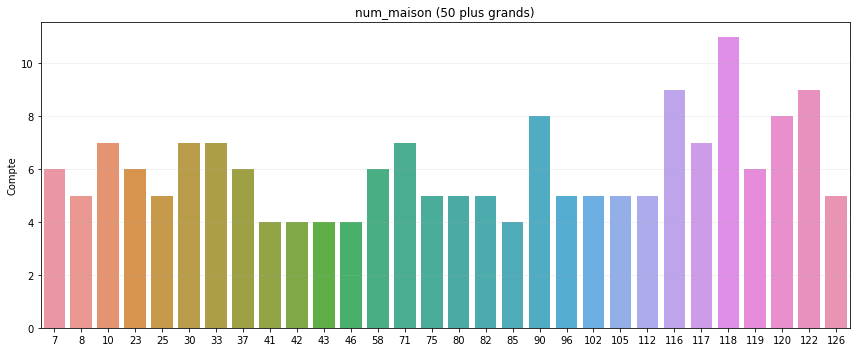

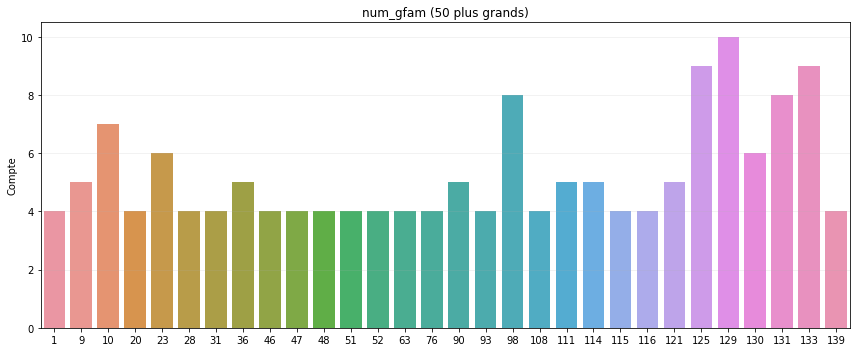

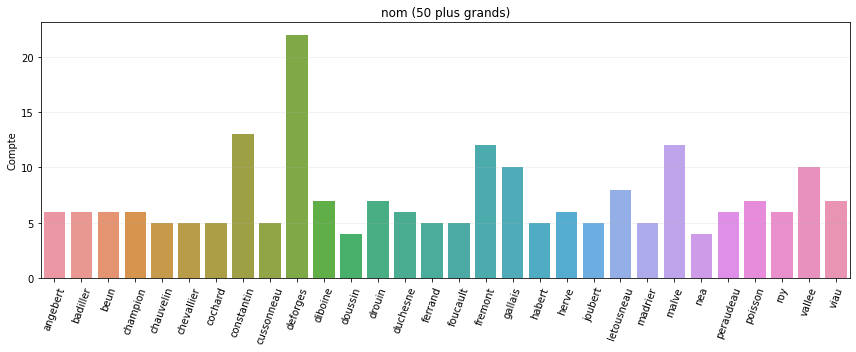

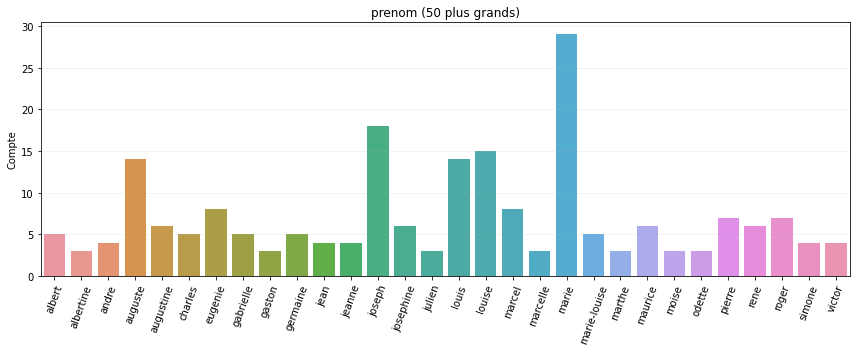

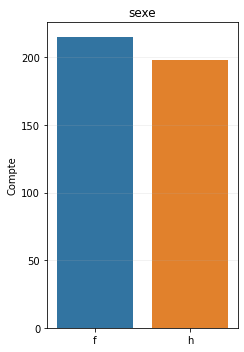

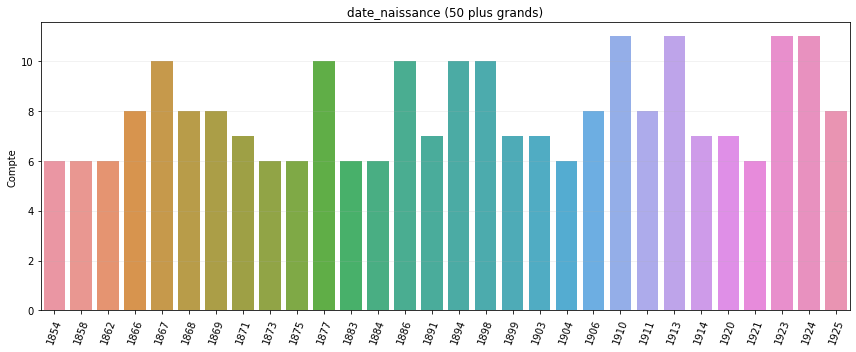

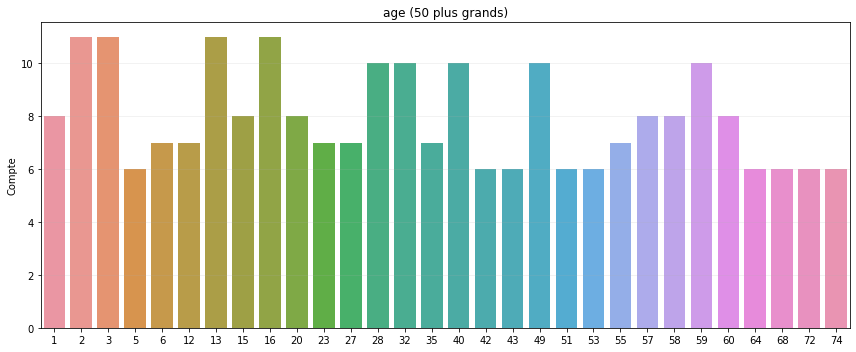

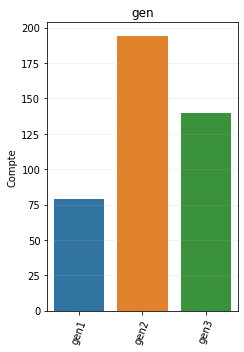

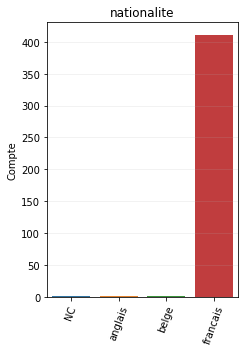

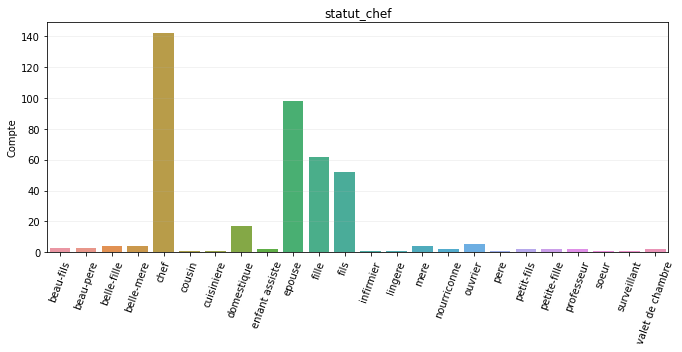

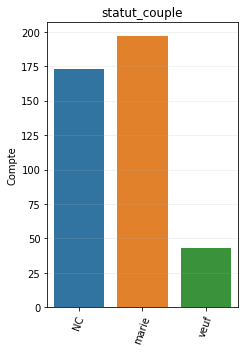

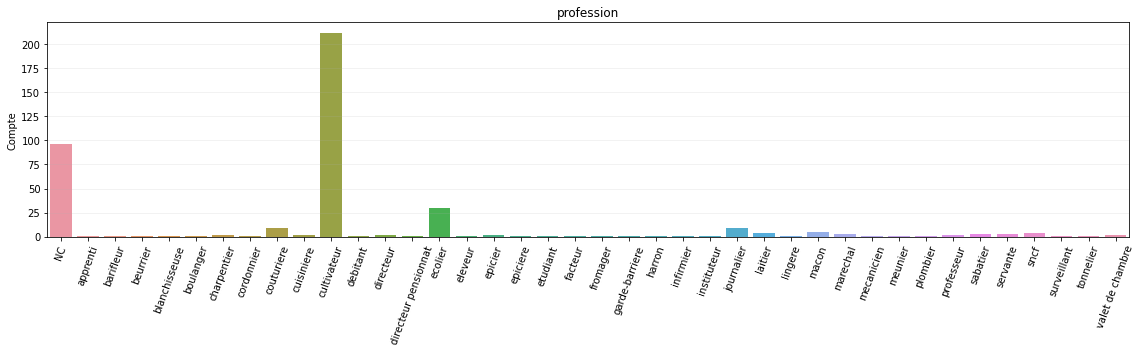

In [112]:
for col in df.columns[1:] :
    labels = df[col].unique()
    labels.sort()
    labels = np.array(labels)
    count = np.array([np.sum(df[col] == l) for l in labels])

    title = col

    thld = 50
    if len(labels) > thld :
        index_decreasing = count.argsort()[::-1][:30]
        labels = labels[index_decreasing]
        count = count[index_decreasing]
        title += f" ({thld} plus grands)"

        index_labels_increasing = labels.argsort()
        labels = labels[index_labels_increasing]
        count = count[index_labels_increasing]

    plt.figure(figsize=(max(3.5,len(labels)/2.5),5))
    plt.grid(alpha=0.2)
    sns.barplot(x=labels, y=count)
    if max([len(str(l)) for l in labels]) > 3 :
        plt.xticks(rotation=70)
    plt.title(title)
    # plt.xlabel(col)
    plt.ylabel("Compte")
    plt.tight_layout()
    plt.savefig(f"./plots/hist/{col}.jpg")

In [81]:
np.sum(df["nom"] == "loiseau")

3